Batch Gradient Descent MSE: 0.7104004443159901
Batch Gradient Descent R² Score: 0.45787883316425704
Stochastic Gradient Descent MSE: 0.7177366398912466
Stochastic Gradient Descent R² Score: 0.4522804316750483
Predicted House Value for MedInc=8.0 (Batch GD): $ 384625.57900788455
Predicted House Value for MedInc=8.0 (Stochastic GD): $ 394559.1842501209


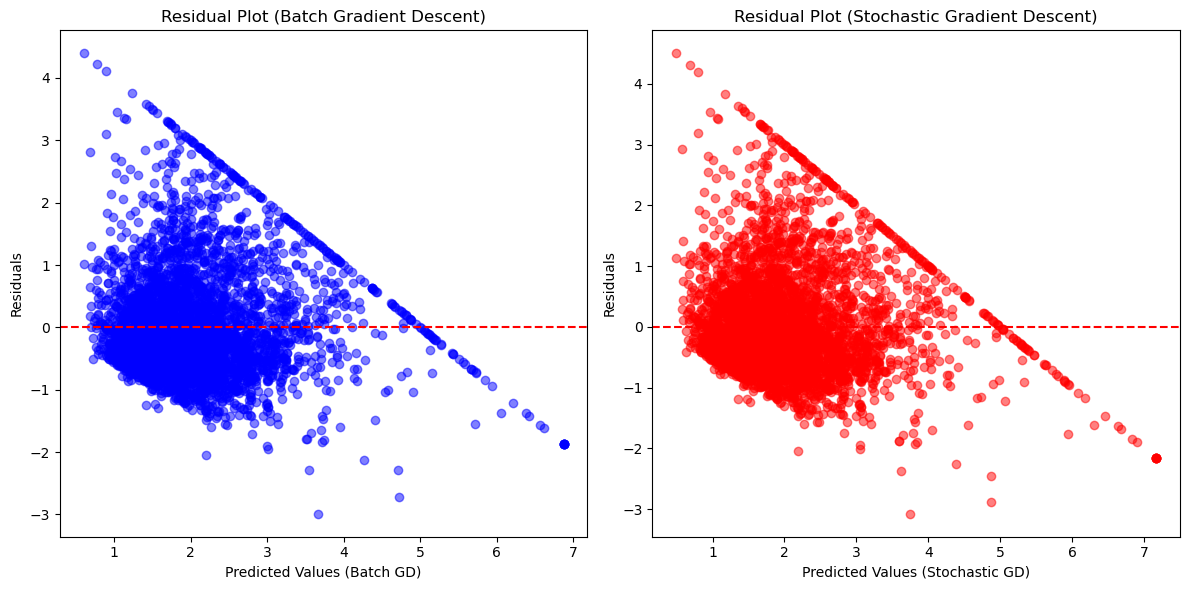

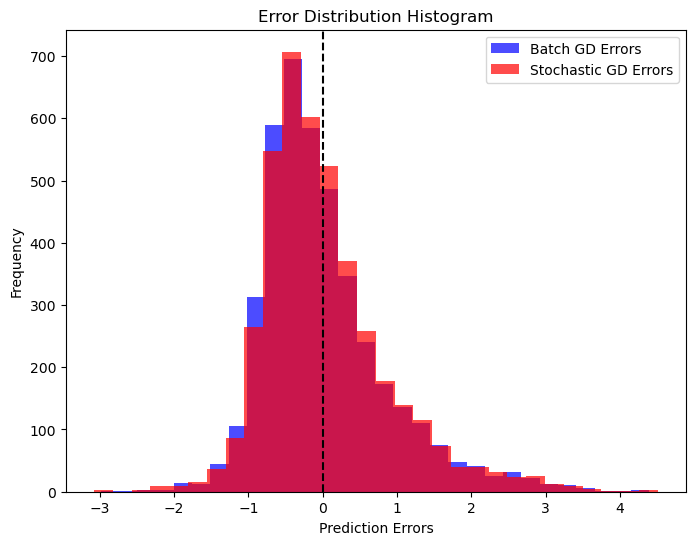

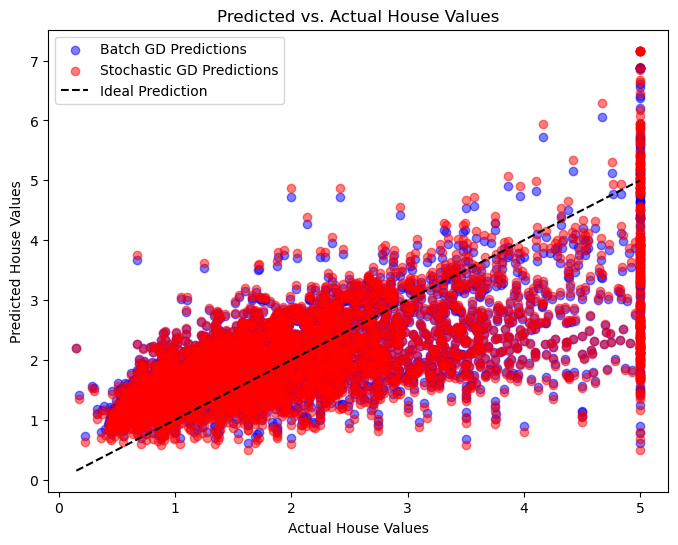

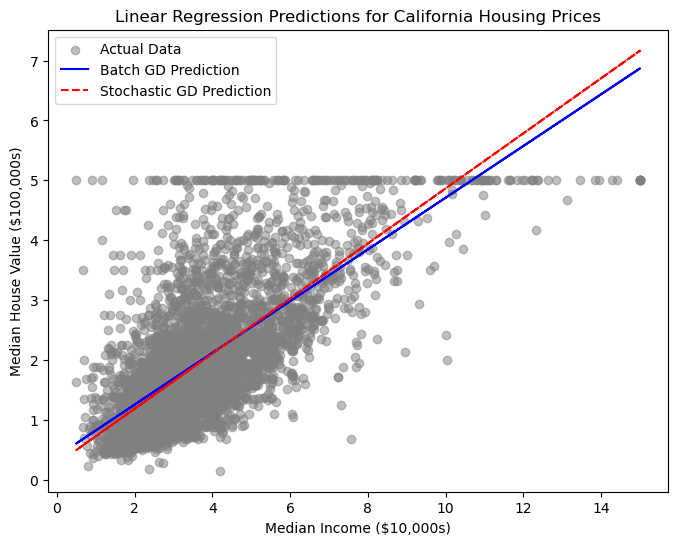

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data[:, [0]]  
y = california.target 

# Split into training and test sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression Model using Batch GD
batch_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
batch_model.fit(X_train_scaled, y_train)

# Train a Linear Regression Model using Stochastic GD
stochastic_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal')
stochastic_model.fit(X_train_scaled, y_train)

# Predictions for the test set
y_pred_batch = batch_model.predict(X_test_scaled)
y_pred_stochastic = stochastic_model.predict(X_test_scaled)

# Evaluate model performance
batch_mse = mean_squared_error(y_test, y_pred_batch)
batch_r2 = r2_score(y_test, y_pred_batch)

stochastic_mse = mean_squared_error(y_test, y_pred_stochastic)
stochastic_r2 = r2_score(y_test, y_pred_stochastic)

# Predict house value for MedInc = 8.0 ($80,000)
med_inc_scaled = scaler.transform(np.array([[8.0]]))
predicted_value_batch = batch_model.predict(med_inc_scaled)[0] * 100000
predicted_value_stochastic = stochastic_model.predict(med_inc_scaled)[0] * 100000

# Print results
print("Batch Gradient Descent MSE:", batch_mse)
print("Batch Gradient Descent R² Score:", batch_r2)
print("Stochastic Gradient Descent MSE:", stochastic_mse)
print("Stochastic Gradient Descent R² Score:", stochastic_r2)
print("Predicted House Value for MedInc=8.0 (Batch GD): $", predicted_value_batch)
print("Predicted House Value for MedInc=8.0 (Stochastic GD): $", predicted_value_stochastic)

# Visualisations
# 1. Residual Plots (Batch GD vs Stochastic GD)
plt.figure(figsize=(12, 6))

# Batch GD Residuals
plt.subplot(1, 2, 1)
residuals_batch = y_test - y_pred_batch
plt.scatter(y_pred_batch, residuals_batch, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Batch GD)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Batch Gradient Descent)")

# Stochastic GD Residuals
plt.subplot(1, 2, 2)
residuals_stochastic = y_test - y_pred_stochastic
plt.scatter(y_pred_stochastic, residuals_stochastic, color='red', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Stochastic GD)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Stochastic Gradient Descent)")

plt.tight_layout()
plt.show()

# 2. Error Distribution Histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals_batch, bins=30, color='blue', alpha=0.7, label="Batch GD Errors")
plt.hist(residuals_stochastic, bins=30, color='red', alpha=0.7, label="Stochastic GD Errors")
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Error Distribution Histogram")
plt.legend()
plt.show()

# 3. Comparison of Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_batch, color='blue', alpha=0.5, label="Batch GD Predictions")
plt.scatter(y_test, y_pred_stochastic, color='red', alpha=0.5, label="Stochastic GD Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Ideal Prediction")
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Predicted vs. Actual House Values")
plt.legend()
plt.show()

# 4. Regression Line Overlay on Test Data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred_batch, color='blue', label="Batch GD Prediction")
plt.plot(X_test, y_pred_stochastic, color='red', linestyle="dashed", label="Stochastic GD Prediction")
plt.xlabel("Median Income ($10,000s)")
plt.ylabel("Median House Value ($100,000s)")
plt.legend()
plt.title("Linear Regression Predictions for California Housing Prices")
plt.show()

Dataset already extracted.

Training Class Distribution:
0    4067
1    3285
Name: binary_label, dtype: int64

Test Class Distribution:
0    1560
1    1387
Name: binary_label, dtype: int64

Training SVM with linear kernel...

Training SVM with poly kernel...

Training SVM with rbf kernel...


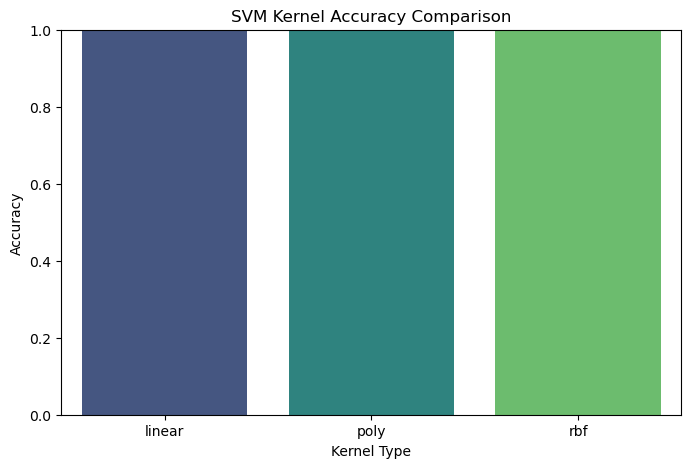

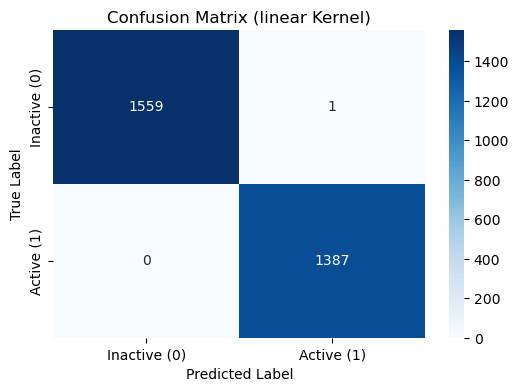

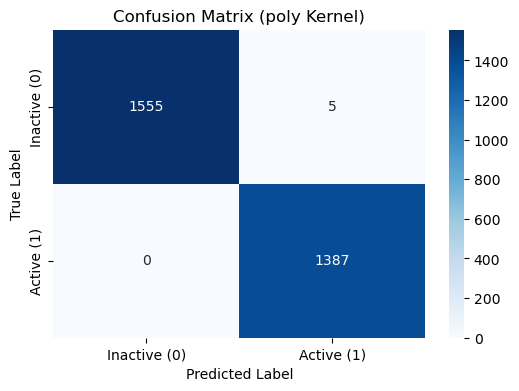

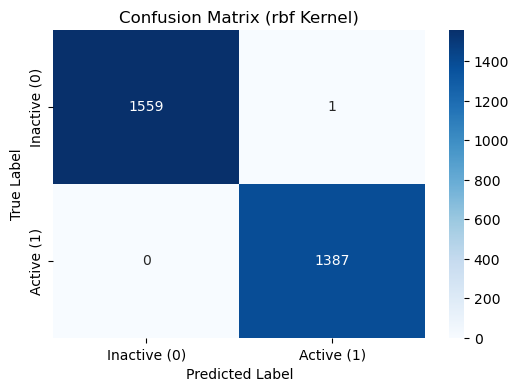


Best-performing kernel: linear with Accuracy: 0.9997


In [9]:
# Import Libraries
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define paths to the dataset ZIP file and extraction directory
zip_file_path = r"C:\Users\User\OneDrive - City, University of London\AI Coursework\UCI_HAR_Dataset\UCI HAR Dataset.zip"
extract_dir = r"C:\Users\User\OneDrive - City, University of London\AI Coursework\UCI_HAR_Dataset\Extracted"

# Extract the dataset if it hasn't been extracted already
if not os.path.exists(extract_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction complete!")
else:
    print("Dataset already extracted.")

# Define the base path to the extracted dataset
base_path = os.path.join(extract_dir, "UCI HAR Dataset")

# Load feature names (561 features)
features_path = os.path.join(base_path, "features.txt")
feature_names = pd.read_csv(features_path, sep="\s+", header=None, names=["idx", "feature"])

# Load activity labels (e.g., WALKING, SITTING)
activity_labels_path = os.path.join(base_path, "activity_labels.txt")
activity_labels = pd.read_csv(activity_labels_path, sep="\s+", header=None, names=["id", "activity"])

# Load training data
X_train_path = os.path.join(base_path, "train", "X_train.txt")
y_train_path = os.path.join(base_path, "train", "y_train.txt")
X_train = pd.read_csv(X_train_path, sep="\s+", header=None)
y_train = pd.read_csv(y_train_path, sep="\s+", header=None, names=["activity_id"])

# Load test data
X_test_path = os.path.join(base_path, "test", "X_test.txt")
y_test_path = os.path.join(base_path, "test", "y_test.txt")
X_test = pd.read_csv(X_test_path, sep="\s+", header=None)
y_test = pd.read_csv(y_test_path, sep="\s+", header=None, names=["activity_id"])

# Assign feature names to the data
X_train.columns = feature_names["feature"]
X_test.columns = feature_names["feature"]

# Map activity IDs to their corresponding labels (e.g., 1 -> WALKING)
y_train["activity"] = y_train["activity_id"].map(activity_labels.set_index("id")["activity"])
y_test["activity"] = y_test["activity_id"].map(activity_labels.set_index("id")["activity"])

# Convert multi-class labels to binary labels (Active = 1, Inactive = 0)
def to_binary_label(activity):
    """Convert activity labels to binary: Active (1) or Inactive (0)."""
    active_activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]
    return 1 if activity in active_activities else 0

y_train["binary_label"] = y_train["activity"].apply(to_binary_label)
y_test["binary_label"] = y_test["activity"].apply(to_binary_label)

# Extract binary labels for training and testing
y_train_binary = y_train["binary_label"]
y_test_binary = y_test["binary_label"]

# Check class distribution
print("\nTraining Class Distribution:")
print(y_train_binary.value_counts())
print("\nTest Class Distribution:")
print(y_test_binary.value_counts())

# Standardize features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality using PCA (fit only on training data)
pca = PCA(n_components=50)  # Reduce from 561 features to 50
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM models with different kernels
kernels = ["linear", "poly", "rbf"]
svm_results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")

    # Use LinearSVC for the linear kernel (faster and more efficient)
    if kernel == "linear":
        svm_model = LinearSVC(C=1, max_iter=10000)  # Increase max_iter for convergence
    else:
        svm_model = SVC(kernel=kernel, C=1, gamma='scale')

    # Fit the model on the full training data
    svm_model.fit(X_train_pca, y_train_binary)

    # Predictions on the test set
    y_pred_svm = svm_model.predict(X_test_pca)

    # Evaluate model performance
    acc = accuracy_score(y_test_binary, y_pred_svm)
    conf_matrix = confusion_matrix(y_test_binary, y_pred_svm)
    class_report = classification_report(y_test_binary, y_pred_svm)

    # Store results
    svm_results[kernel] = {
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report,
        "Predictions": y_pred_svm
    }

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
accuracies = [svm_results[kernel]["Accuracy"] for kernel in kernels]
sns.barplot(x=kernels, y=accuracies, palette="viridis")
plt.title("SVM Kernel Accuracy Comparison")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot Confusion Matrices
for kernel in kernels:
    cm = svm_results[kernel]["Confusion Matrix"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Inactive (0)", "Active (1)"],
                yticklabels=["Inactive (0)", "Active (1)"])
    plt.title(f"Confusion Matrix ({kernel} Kernel)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Print the best-performing kernel
best_kernel = max(svm_results, key=lambda k: svm_results[k]["Accuracy"])
print(f"\nBest-performing kernel: {best_kernel} with Accuracy: {svm_results[best_kernel]['Accuracy']:.4f}")